# Hotel Reviews: Text Insights & Analysis

## Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk import FreqDist, bigrams
import nltk.collocations as collocations
import nltk

## Data

In [2]:
reviews_df = pd.read_csv('data/hotel_text_cln.csv')
reviews_df.head(2)

,hotel_city,latitude,longitude,name,hotel_state,date,rating,text,user_city,user_state,language,score,cln_full_sentence,text_cln
0,Mableton,45.421611,12.376187,Hotel Russo Palace,GA,2013-09-22 00:00:00+00:00,4.0,Pleasant 10 min walk along the sea front to th...,NaN,NaN,"('en', -390.9012541770935)",positive,pleasant min walk along sea front water bus re...,pleasant min walk along sea front water bus re...
1,Mableton,45.421611,12.376187,Hotel Russo Palace,GA,2015-04-03 00:00:00+00:00,5.0,Really lovely hotel. Stayed on the very top fl...,NaN,NaN,"('en', -535.3024659156799)",positive,really lovely hotel stay top floor surprise ja...,really lovely hotel stay top floor surprise ja...


In [3]:
reviews_df.isnull().sum()

hotel_city               0
latitude                64
longitude               64
name                     0
hotel_state              0
date                    42
rating                   0
text                     0
user_city            16407
user_state           15351
language                 0
score                    0
cln_full_sentence       27
text_cln                27
dtype: int64

In [4]:
# missing text is recognized after cleaning, drop rows where there are no reviews
reviews_df.dropna(subset=['text_cln'], inplace=True)

In [5]:
# separate out positive and negative reviews in respective dataframes

pos = reviews_df.loc[(reviews_df['score']=='positive')]
neg = reviews_df.loc[(reviews_df['score']=='negative')]

## Word Clouds

Set stopwords to remove instances of the word "hotel" due to these being the most common in both negative and positive reviews.

In [6]:
stopwords = set(STOPWORDS)
stopwords.update(['hotel', 'room', 'stay'])

### Positive Reviews

In [7]:
pos_text = " ".join(review for review in pos.text_cln)

In [8]:
# sample of text to verify
pos_text[:2000]

'pleasant min walk along sea front water bus restaurant etc hotel comfortable breakfast good quite variety room aircon work well take mosquito repelant really lovely hotel stay top floor surprise jacuzzi bath know get staff friendly helpful included breakfast great great location great value money want leave stay four night october hotel staff welcome friendly helpful assist book ticket opera room clean comfortable good shower light airy room window could open wide bed comfortable plenty choice breakfast spa hotel nearby use love stay island lido need take water venice get train station boat ride take minute beautiful view along way hotel easy walk boat dock room clean breakfast plentiful would definitely recommend hotel lovely view onto lagoon excellent view staff welcome helpful hotel staff friendly helpful room clean comfortable wife room terrace look water great view look stay hotel next time venice pleased nice hotel friendly staff helpful great choice breakfast something everyone

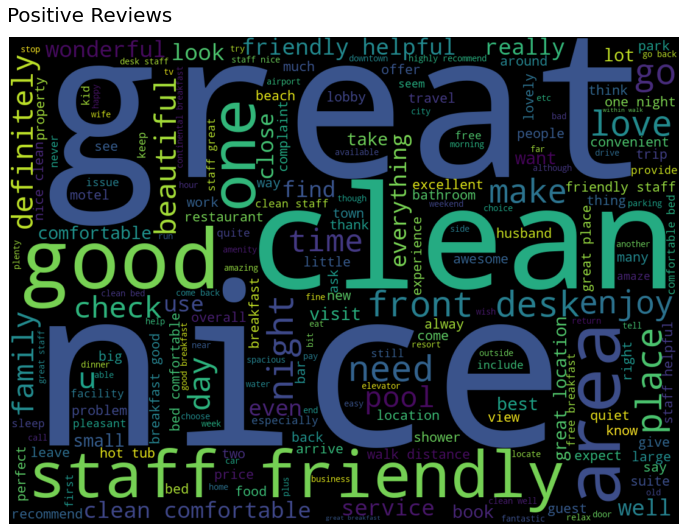

In [9]:
# create figure
fig, ax = plt.subplots(figsize = (12,10))

wordcloud = WordCloud(width=1100, height=800, stopwords=stopwords).generate(pos_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

ax.set_title('Positive Reviews', pad=15, fontsize = 20)
ax.title.set_position([.12, 0])

plt.savefig('graphs/pos_word_cloud.jpg', format='jpg', dpi=300, bbox_inches='tight')

plt.show()

### Negative Reviews

In [10]:
neg_text = " ".join(review for review in neg.text_cln)

In [11]:
# sample of text to verify
neg_text[:2000]

'stay unless less foot tall like sleep centipede th floor room attic vaulted ceiling angle ft bed accessible one side place head skylight side might able sit bathtub impractical broken shower head move st floor next day within minute find centipede wall fly ask broom get rid centipede later day receptionist say give u something control bug never complain drain fly must notice problem night spend hrs catch centipede room come throw pillow ask reception new room hotel supposedly hotel open room want leave would pay transportation hotel next morning go reception tell bug problem barely say anything woman apologize say put bug room purpose go day forget add often go vacation child sometimes thing happen try make best everything start war add euro go make anything go away go enjoy day talk less time pathetic discriminatory free shuttle service accessible wheelchair user care front desk anything issue email corporate customer care email address take unreasonable amount time respond email rem

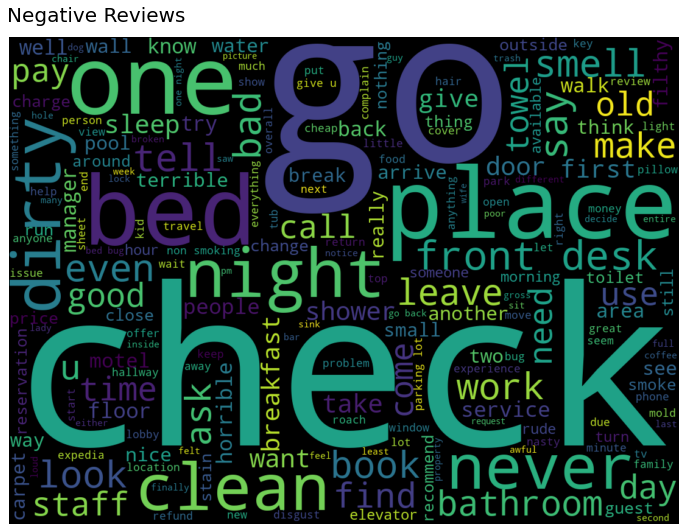

In [13]:
# create figure
fig, ax = plt.subplots(figsize = (12,10))

wordcloud = WordCloud(width=1100, height=800, stopwords=stopwords).generate(neg_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

ax.set_title('Negative Reviews', pad=15, fontsize = 20)
ax.title.set_position([.13, 0])

plt.savefig('graphs/neg_word_cloud.jpg', format='jpg', dpi=300, bbox_inches='tight')

plt.show()

Words to look at in bi-grams to gain more insight: go, check, one, bad, room

## Term Frequency & Inverse Document Frequency (TF-IDF)

### Positive Reviews TF-IDF

In [14]:
pos_corpus = pos.text_cln.tolist()

In [15]:
pos_corpus[:10]

['pleasant min walk along sea front water bus restaurant etc hotel comfortable breakfast good quite variety room aircon work well take mosquito repelant',
 'really lovely hotel stay top floor surprise jacuzzi bath know get staff friendly helpful included breakfast great great location great value money want leave',
 'stay four night october hotel staff welcome friendly helpful assist book ticket opera room clean comfortable good shower light airy room window could open wide bed comfortable plenty choice breakfast spa hotel nearby use',
 'love stay island lido need take water venice get train station boat ride take minute beautiful view along way hotel easy walk boat dock room clean breakfast plentiful would definitely recommend hotel',
 'lovely view onto lagoon excellent view staff welcome helpful',
 'hotel staff friendly helpful room clean comfortable wife room terrace look water great view look stay hotel next time venice pleased',
 'nice hotel friendly staff helpful great choice bre

In [16]:
# initiate TfidVectorizer
tfIdfVectorizer=TfidfVectorizer(use_idf=True)

# fit the positive documents
tfIdf = tfIdfVectorizer.fit_transform(pos_corpus)

# create dataframe of positive tfidf's
pos_tfidf = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), 
                         columns=["TF-IDF"])

# sort in descending order
pos_tfidf = pos_tfidf.sort_values('TF-IDF', ascending=False)

In [17]:
pos_tfidf.head(25)

,TF-IDF
repelant,0.400215
aircon,0.373139
mosquito,0.364423
sea,0.261898
bus,0.230537
min,0.226447
along,0.222953
variety,0.218422
etc,0.199257
quite,0.185564


### Negative Reviews TF-IDF

In [18]:
neg_corpus = neg.text_cln.tolist()

In [19]:
neg_corpus[:10]

['stay unless less foot tall like sleep centipede th floor room attic vaulted ceiling angle ft bed accessible one side place head skylight side might able sit bathtub impractical broken shower head move st floor next day within minute find centipede wall fly ask broom get rid centipede later day receptionist say give u something control bug never complain drain fly must notice problem night spend hrs catch centipede room come throw pillow ask reception new room hotel supposedly hotel open room want leave would pay transportation hotel next morning go reception tell bug problem barely say anything woman apologize say put bug room purpose go day forget add often go vacation child sometimes thing happen try make best everything start war add euro go make anything go away go enjoy day talk less time',
 'pathetic discriminatory free shuttle service accessible wheelchair user care front desk anything issue email corporate customer care email address take unreasonable amount time respond emai

In [20]:
# initiate TfidVectorizer
tfIdfVectorizer=TfidfVectorizer(use_idf=True)

# fit the positive documents
tfIdf = tfIdfVectorizer.fit_transform(neg_corpus)

# create dataframe of positive tfidf's
neg_tfidf = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), 
                         columns=["TF-IDF"])

# sort in descending order
neg_tfidf = neg_tfidf.sort_values('TF-IDF', ascending=False)

In [21]:
neg_tfidf.head(25)

,TF-IDF
centipede,0.441364
go,0.220614
day,0.177116
fly,0.175472
add,0.175472
bug,0.168496
reception,0.160021
head,0.140550
side,0.137483
less,0.135160


## Bag of Words

### Positive Reviews BoW

In [22]:
# create corpus of all positive reviews
pos_corpus = " ".join(review for review in pos.text_cln)

# tokenize the words
pos_tokens = word_tokenize(pos_corpus)

# find frequency of each token
fdist = FreqDist(pos_tokens)

fdist.most_common(20)

[('room', 13478),
 ('hotel', 11634),
 ('stay', 11324),
 ('great', 7899),
 ('staff', 7313),
 ('clean', 7149),
 ('nice', 6118),
 ('breakfast', 5726),
 ('good', 5389),
 ('friendly', 4334),
 ('comfortable', 3753),
 ('would', 3376),
 ('place', 3172),
 ('night', 3083),
 ('bed', 3073),
 ('location', 3057),
 ('area', 2723),
 ('time', 2647),
 ('get', 2611),
 ('helpful', 2560)]

In [23]:
# create series of frequency
pos_fdist = pd.Series(dict(fdist))

# sort in descenidng order
pos_fdist.sort_values(ascending=False, inplace=True)

pos_fdist_top = pos_fdist.head(20)

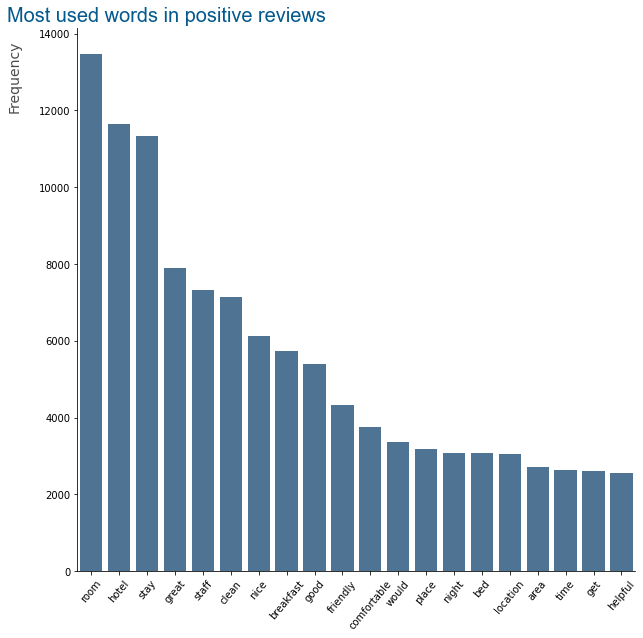

In [24]:
# plot the frequency

font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 20}

fix, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=pos_fdist_top.index, y=pos_fdist_top.values, ax=ax, color = "#44749D")
plt.xticks(rotation=50);

ax.set_title("Most used words in positive reviews", fontdict=font)
ax.set_ylabel('Frequency', fontsize = 14, color='#4c4c4c')

# set axis label positions
ax.yaxis.set_label_coords(-.1,.91)
ax.title.set_position([.16, .8])

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.savefig('graphs/postive_frequency.jpg', format='jpg', dpi=300, bbox_inches='tight')

plt.show()


### Negative Reviews BoW

In [25]:
# create corpus of all positive reviews
neg_corpus = " ".join(review for review in neg.text_cln)

# tokenize the words
neg_tokens = word_tokenize(neg_corpus)

# find frequency of each token
fdist = FreqDist(neg_tokens)

fdist.most_common(20)

[('room', 3442),
 ('hotel', 1930),
 ('stay', 1555),
 ('get', 888),
 ('bed', 789),
 ('night', 765),
 ('go', 742),
 ('would', 731),
 ('check', 645),
 ('one', 612),
 ('place', 609),
 ('bad', 600),
 ('dirty', 598),
 ('like', 575),
 ('desk', 563),
 ('front', 527),
 ('u', 519),
 ('never', 517),
 ('smell', 513),
 ('say', 502)]

In [26]:
# create series of frequency
neg_fdist = pd.Series(dict(fdist))

# sort in descenidng order
neg_fdist.sort_values(ascending=False, inplace=True)

neg_fdist_top = neg_fdist.head(20)

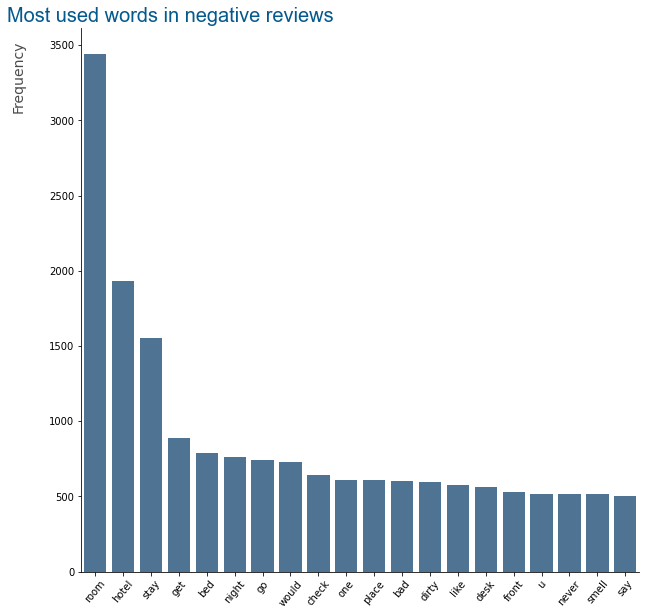

In [27]:
# plot the frequency

font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 20}

fix, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=neg_fdist_top.index, y=neg_fdist_top.values, ax=ax, color = "#44749D")
plt.xticks(rotation=50);

ax.set_title("Most used words in negative reviews", fontdict=font)
ax.set_ylabel('Frequency', fontsize = 14, color='#4c4c4c')

# set axis label positions
ax.yaxis.set_label_coords(-.1,.91)
ax.title.set_position([.16, .8])

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.savefig('graphs/negative_frequency.jpg', format='jpg', dpi=300, bbox_inches='tight')

plt.show()

## Bigrams & Trigrams

### Positive

In [28]:
pos_bigrams = (pd.Series(nltk.ngrams(pos_tokens, 2)).value_counts())[:25]
pos_bigrams

(room, clean)           1796
(staff, friendly)       1419
(front, desk)           1298
(friendly, helpful)      851
(clean, comfortable)     838
(place, stay)            804
(stay, hotel)            798
(great, location)        700
(friendly, staff)        697
(bed, comfortable)       695
(would, stay)            671
(clean, room)            670
(one, night)             611
(room, nice)             578
(walk, distance)         578
(hotel, staff)           572
(definitely, stay)       555
(hotel, clean)           533
(breakfast, good)        524
(would, definitely)      520
(nice, hotel)            484
(great, place)           466
(enjoy, stay)            453
(hotel, great)           448
(hot, tub)               442
dtype: int64

In [29]:
pos_trigrams = (pd.Series(nltk.ngrams(pos_tokens, 3)).value_counts())[:25]
pos_trigrams

(staff, friendly, helpful)    433
(would, definitely, stay)     345
(room, clean, comfortable)    282
(within, walk, distance)      256
(front, desk, staff)          245
(stay, one, night)            240
(great, place, stay)          217
(room, clean, bed)            169
(clean, bed, comfortable)     168
(pool, hot, tub)              167
(clean, staff, friendly)      141
(hotel, staff, friendly)      140
(would, recommend, hotel)     133
(staff, friendly, room)       131
(room, nice, clean)           123
(friendly, helpful, staff)    114
(hotel, great, location)      105
(would, highly, recommend)    104
(one, night, stay)            103
(room, clean, staff)          101
(holiday, inn, express)       100
(clean, comfortable, room)     95
(friendly, room, clean)        94
(nice, place, stay)            94
(really, enjoy, stay)          90
dtype: int64

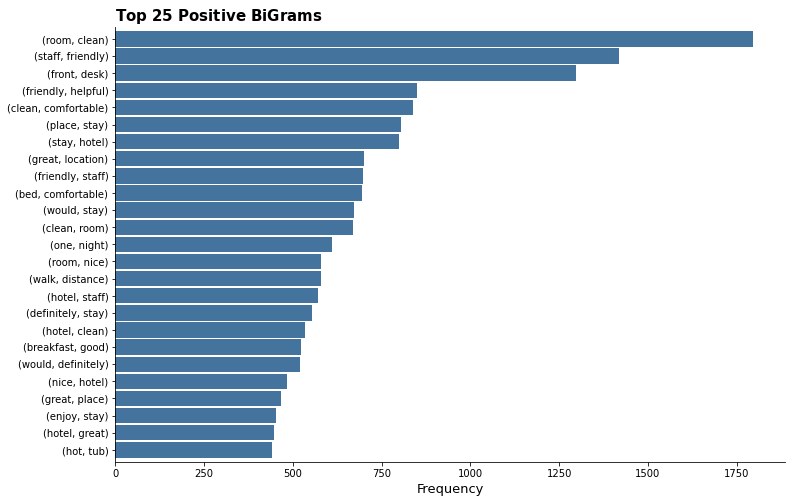

In [30]:
# create figure
fig, ax = plt.subplots(figsize = (12,8))

# width of the bar
width = .85

# create horizontal bar chart


pos_bigrams.sort_values().plot.barh(color='#44749D', width=.9)

# remove x axis ticks
#ax.axes.xaxis.set_ticks([])

# remove vertical grid
ax.xaxis.grid(False)

# remove horizontal grid
ax.yaxis.grid(False)

# set x axis label
ax.set_xlabel('Frequency', fontsize = 13)

# title
ax.set_title('$\\bf{Top\ 25\ Positive\ BiGrams}$', fontsize = 15, loc = 'left')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.savefig('graphs/pos_bigrams.jpg', format='jpg', dpi=300, bbox_inches='tight')

plt.show()

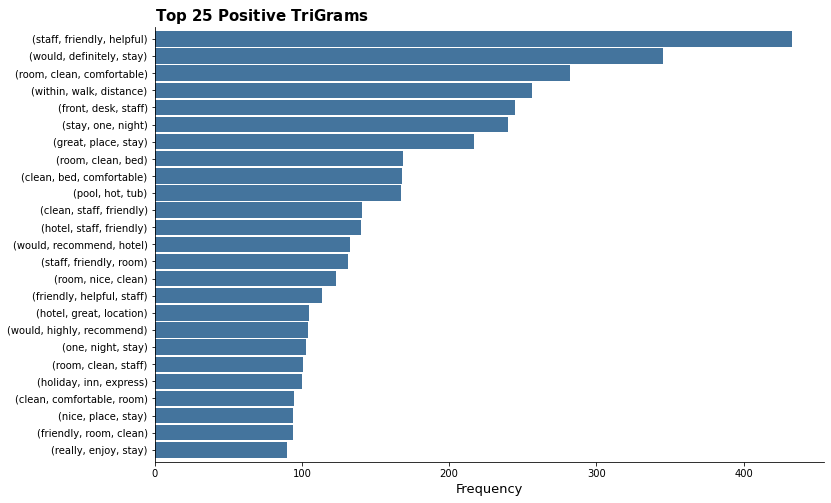

In [31]:
# create figure
fig, ax = plt.subplots(figsize = (12,8))

# width of the bar
width = .85

# create horizontal bar chart


pos_trigrams.sort_values().plot.barh(color='#44749D', width=.9)

# remove x axis ticks
#ax.axes.xaxis.set_ticks([])

# remove vertical grid
ax.xaxis.grid(False)

# remove horizontal grid
ax.yaxis.grid(False)

# set x axis label
ax.set_xlabel('Frequency', fontsize = 13)

# title
ax.set_title('$\\bf{Top\ 25\ Positive\ TriGrams}$', fontsize = 15, loc = 'left')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

### Negative

In [32]:
neg_bigrams = (pd.Series(nltk.ngrams(neg_tokens, 2)).value_counts())[:25]
neg_bigrams

(front, desk)         426
(room, smell)         143
(never, stay)         140
(stay, hotel)         139
(smoking, room)       122
(hotel, com)          121
(non, smoking)        113
(smell, like)         106
(get, room)           106
(look, like)          104
(bad, hotel)          102
(room, clean)          96
(room, dirty)          86
(ever, stay)           85
(another, room)        79
(give, u)              75
(parking, lot)         75
(hotel, room)          74
(one, night)           73
(book, room)           69
(bed, bug)             69
(go, back)             69
(would, recommend)     68
(book, hotel)          66
(hotel, ever)          62
dtype: int64

In [33]:
neg_trigrams = (pd.Series(nltk.ngrams(neg_tokens, 3)).value_counts())[:25]
neg_trigrams

(non, smoking, room)          89
(call, front, desk)           55
(bad, hotel, ever)            50
(room, smell, like)           47
(hotel, ever, stay)           30
(go, front, desk)             29
(would, recommend, hotel)     28
(smell, like, smoke)          25
(would, never, stay)          25
(front, desk, staff)          25
(front, desk, tell)           24
(get, money, back)            23
(never, go, back)             21
(recommend, hotel, anyone)    20
(lady, front, desk)           19
(stay, one, night)            18
(front, desk, person)         16
(front, desk, say)            16
(bad, hotel, stay)            15
(never, stay, hotel)          15
(bad, place, ever)            15
(book, hotel, com)            15
(bad, hotel, experience)      14
(stay, somewhere, else)       14
(place, ever, stay)           14
dtype: int64

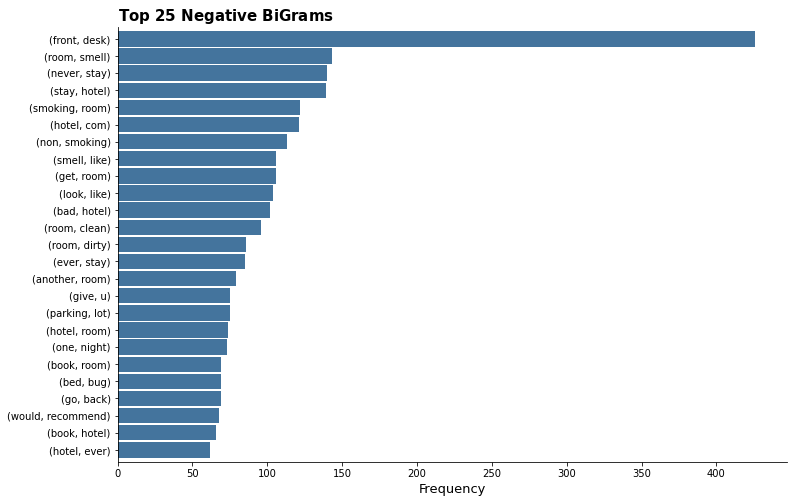

In [34]:
# create figure
fig, ax = plt.subplots(figsize = (12,8))

# width of the bar
width = .85

# create horizontal bar chart


neg_bigrams.sort_values().plot.barh(color='#44749D', width=.9)

# remove x axis ticks
#ax.axes.xaxis.set_ticks([])

# remove vertical grid
ax.xaxis.grid(False)

# remove horizontal grid
ax.yaxis.grid(False)

# set x axis label
ax.set_xlabel('Frequency', fontsize = 13)

# title
ax.set_title('$\\bf{Top\ 25\ Negative\ BiGrams}$', fontsize = 15, loc = 'left')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.savefig('graphs/neg_bigrams.jpg', format='jpg', dpi=300, bbox_inches='tight')

plt.show()

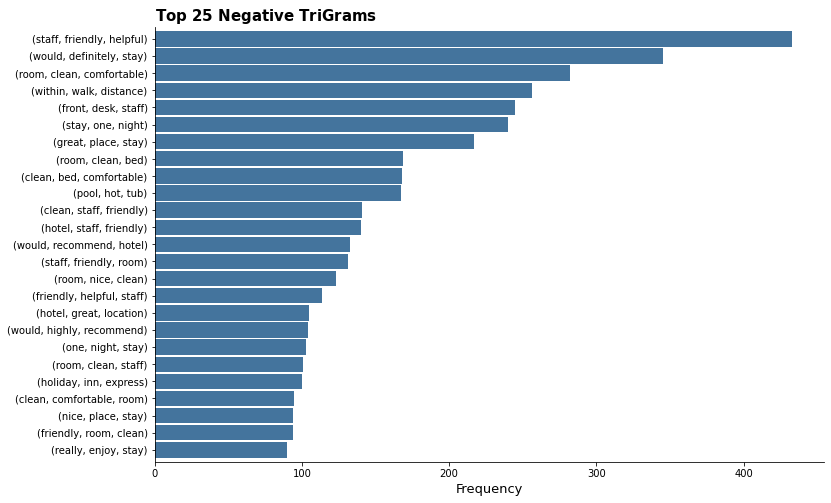

In [35]:
# create figure
fig, ax = plt.subplots(figsize = (12,8))

# width of the bar
width = .85

# create horizontal bar chart


pos_trigrams.sort_values().plot.barh(color='#44749D', width=.9)

# remove x axis ticks
#ax.axes.xaxis.set_ticks([])

# remove vertical grid
ax.xaxis.grid(False)

# remove horizontal grid
ax.yaxis.grid(False)

# set x axis label
ax.set_xlabel('Frequency', fontsize = 13)

# title
ax.set_title('$\\bf{Top\ 25\ Negative\ TriGrams}$', fontsize = 15, loc = 'left')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()